# Basic usage

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

from kw_mle.kw_mle import KWMLE

## Generate data

In [2]:
sz = 1000
data = normal(loc=10, size=sz) + normal(size=sz)
stds = [1]*len(data)

Here the standard deviations are assumed to be known and all equal to 1. In certain applications, they can be estimated via a so-called variance-stabilizing transformation. For details of how such a transformation is applied, see Brown (2008) [In-season Prediction of Batting Averages a Field Test of Empirical Bayes and Bayes Methodologies](https://arxiv.org/pdf/0803.3697.pdf).

## Fit the model and make prediction

In [3]:
kw_mle = KWMLE(data, stds=stds)
kw_mle.fit()
pred = kw_mle.prediction(np.sort(data), stds) # For easiness of visualization, the data is sorted

11


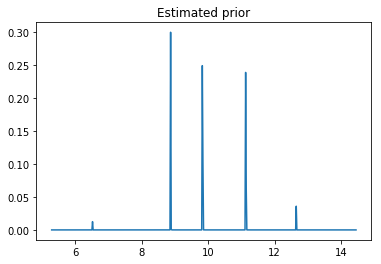

In [4]:
plt.plot(kw_mle.grid_of_mean, kw_mle.prior)
plt.title("Estimated prior")
plt.show()

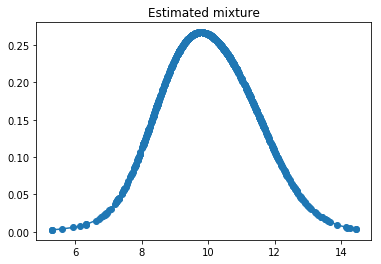

In [5]:
mixture_sorted = kw_mle.mixture[np.argsort(kw_mle.data)]
plt.plot(np.sort(data), mixture_sorted, '-o')
plt.title("Estimated mixture")
plt.show()

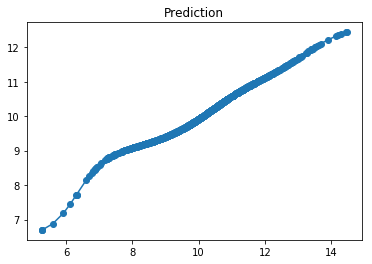

In [6]:
plt.plot(np.sort(data), pred, '-o')
plt.title("Prediction")
plt.show()